In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/MyDrive/datasets'

Mounted at /content/drive
dataset_four.csv  dataset_one.csv  dataset_three.csv  dataset_two.csv


In [3]:
d1 = pd.read_csv('/content/drive/MyDrive/datasets/dataset_one.csv')
d2 = pd.read_csv('/content/drive/MyDrive/datasets/dataset_two.csv')
d3 = pd.read_csv('/content/drive/MyDrive/datasets/dataset_three.csv')
d4 = pd.read_csv('/content/drive/MyDrive/datasets/dataset_four.csv')

In [4]:
d1['id'] = range(1, 2566)
d2['id'] = range(1, 137)
d3['id'] = range(1, 1076)
d4['id'] = range(1, 396)

In [5]:
data = pd.merge(d1, d2, how='inner', on='id')
data = pd.merge(data, d3, how='inner', on='id')
data = pd.merge(data, d4, how='inner', on='id')

In [6]:
data = data[['age_x', 'Gender', 'major_y', 'origin', 'Total Hours in Module Area', 'romantic', 'final' ]]
data = data.rename(columns={'age_x':'Age', 'major_y':'Undergrad', 'origin':'Nationality', 'Total Hours in Module Area':'hoursOfWork', 'romantic':'maritalStatus', 'final':'Grade'})

In [7]:
data['Undergrad'] = data['Undergrad'].replace({'Natural Resources and Conservation':'Social Sciences', 'Communication, Journalism':'Communications Technologies', 'Communications Technologies/Technicians':'Communications Technologies', 'Construction Trades':'Engineering', 'Engineering Technologies/Technicians':'Engineering', 'Mechanic and Repair Technologies/Technicians':'Engineering', 'Military Technologies':'Engineering'})
data['Undergrad'] = data['Undergrad'].replace({'Transportation and Materials Moving':'Transportation & Logistics', 'Architecture':'Engineering', 'Residency Programs':'Social Sciences', 'English Language and Literature/Letters':'Language & Literature', 'Foreign Languages, Literatures and Linguistics':'Language & Literature', 'Theology and Religious Vocations':'Philosophy and Religious Studies', 'Intensive English':'Language & Literature', 'Homeland Security, Law Enforcement, and Firefighting':'Social Sciences'})
data['Undergrad'] = data['Undergrad'].replace({'Computer and Information Sciences':'Communications Technologies', 'Basic Skills':'Social Sciences', 'Family and Consumer Sciences/Human Sciences':'Social Sciences', 'Liberal Arts and Sciences/General Studies':'General Studies', 'Multi/Interdisciplinary Studies':'General Studies', 'Parks, Recreation, Leisure and Fitness Studies':'Social Sciences', 'Personal and Culinary Services':'Culinary Service', 'Reserve Officer Training Corps':'Social Sciences', 'Science Technologies/Technicians':'Communications Technologies', 'Area, Ethnic, Cultural and Gender Studies':'General Studies', 'History':'Languge & Literature'})
data['Undergrad'] = data['Undergrad'].replace({'Languge & Literature':'Language & Literature', 'Psychology':'Health Professions', 'Public Administration and Social Service Professions':'Social Sciences', 'Undeclared':'Social Sciences', 'Precision Production':'Agriculture', 'Philosophy and Religious Studies':'Language & Literature', 'Physical Sciences':'Health Professions'})

In [8]:
data['Nationality'] = data['Nationality'].replace({'Africa, Subsaharan, Unspecified':'Africa', 'Cameroon':'Africa', 'Central Africa, Unspecified':'Africa', 'Central African Republic':'Africa', 'Chad':'Africa', 'Congo, Dem. Rep. of the (Kinshasa)':'Africa', 'Congo, Republic of the (Brazzaville)':'Africa', 'Equatorial Guinea':'Africa', 'Gabon':'Africa', 'SÃ£o TomÃ© and PrÃ\xadncipe':'Africa', 'Burundi':'Africa', 'Djibouti':'Africa', 'East Africa, Unspecified':'Africa', 'Eritrea':'Africa', 'Ethiopia':'Africa', 'Kenya':'Africa', 'Rwanda':'Africa', 'Seychelles':'Africa', 'Somalia':'Africa', 'Sudan':'Africa', 'Tanzania':'Africa', 'Trinidad and Tobago':'Africa'})
data['Nationality'] = data['Nationality'].replace({'Asia, Unspecified':'Asia', 'Anguilla':'Asia', 'Antigua and Barbuda':'Asia', 'Aruba':'Asia', 'Haiti':'Asia', 'Bahamas':'North America', 'Dominica':'North America', 'Dominican Republic':'North America', 'Grenada':'North America', 'Jamaica':'North America', 'Cayman Islands':'North America', 'Cuba':'North America', 'Guadeloupe':'North America', 'Martinique':'North America', 'Montserrat':'North America', 'St. Kitts and Nevis':'North America', 'St. Lucia':'North America', 'St. Vincent and the Grenadines':'North America', 'Turks and Caicos':'North America', 'Barbados':'North America', 'British Virgin Islands':'North America', 'Caribbean, Unspecified':'North America', 'Netherlands Antilles':'Europe','Bermuda':'Europe'})
data['Nationality'] = data['Nationality'].replace(['Uganda', 'Algeria', 'Egypt', 'Libya', 'Morocco', 'North Africa, Unspecified', 'Tunisia', 'Western Sahara', 'Angola', 'Botswana', 'Comoros', 'Eswatini', 'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia', 'Reunion', 'South Africa', 'Southern Africa, Unspecified', 'Zambia', 'Zimbabwe', 'Stateless', 'Benin', 'Burkina Faso', 'Cabo Verde', 'CÃ´te dâ€™Ivoire', 'Gambia, The', 'Ghana', 'Guinea', 'GuineaBissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Saint Helena', 'Senegal', 'Sierra Leone', 'Togo', 'West Africa, Unspecified', 'TimorLeste'], 'Africa')
data['Nationality'] = data['Nationality'].replace(['China', 'East Asia, Unspecified', 'Hong Kong', 'Japan', 'Macau', 'Mongolia', 'North Korea', 'South Korea', 'Taiwan', 'Armenia', 'Turkey', 'Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Middle East, Unspecified', 'Oman', 'Palestinian Territories', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen', 'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Kazakhstan', 'Kyrgyzstan', 'Maldives', 'Nepal', 'Pakistan', 'South and Central Asia, Unspecified', 'Sri Lanka', 'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Brunei', 'Burma/Myanmar', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Southeast Asia, Unspecified', 'Thailand', 'Vietnam'], 'Asia')
data['Nationality'] = data['Nationality'].replace(['Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia/Czech Republic', 'Czechoslovakia, Former', 'Denmark', 'Estonia', 'Europe, Unspecified', 'Finland', 'France', 'Georgia', 'Germany', 'Gibraltar', 'Greece', 'Holy See', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'U.S.S.R., Former', 'Ukraine', 'United Kingdom', 'Albania', 'Andorra', 'Austria'], 'Europe')
data['Nationality'] = data['Nationality'].replace(['Yugoslavia, Former', 'Latin America and Caribbean, Unspecified', 'Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Mexico and Central America, Unspecified', 'Nicaragua', 'Panama', 'Canada', 'Australia'], 'North America')
data['Nationality'] = data['Nationality'].replace(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands/Islas Malvinas', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'South America, Unspecified', 'Suriname', 'Uruguay', 'Venezuela'], 'South America')
data['Nationality'] = data['Nationality'].replace(['Cook Islands', 'Fiji', 'French Polynesia', 'Kiribati', 'Marshall Islands, Republic of the', 'Micronesia, Federate States of ', 'Nauru', 'New Caledonia', 'New Zealand', 'Niue', 'Norfolk Island', 'Pacific Islands, Unspecified', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'Wallis and Futuna'], 'Oceania')

In [9]:
data['Nationality'].value_counts()

Nationality
Africa           64
North America    51
Asia             15
Europe            6
Name: count, dtype: int64

In [ ]:
data['Grade'] = data['Grade'].apply(lambda x: 30 if x == 12 else x)
data['Grade'] = data['Grade'].apply(lambda x: 40 if x == 2 else x)
data['Grade'] = data['Grade'].apply(lambda x: 53 if x == 15 else x)
data['Grade'] = data['Grade'].apply(lambda x: 43 if x == 0 else x)
data['Grade'] = data['Grade'].apply(lambda x: 42 if x == 11 else x)
data['Grade'] = data['Grade'].apply(lambda x: 51 if x == 18 else x)
data['Grade'] = data['Grade'].apply(lambda x: 35 if x == 17 else x)
data['Grade'] = data['Grade'].apply(lambda x: 39 if x == 16 else x)
data['Grade'] = data['Grade'].apply(lambda x: 38 if x == 14 else x)
data['Grade'] = data['Grade'].apply(lambda x: 80 if x == 13 else x)
data['Grade'] = data['Grade'].apply(lambda x: 75 if x == 24 else x)
data['Grade'] = data['Grade'].apply(lambda x: 85 if x == 27 else x)
data['Grade'] = data['Grade'].apply(lambda x: 34 if x == 6 else x)
data['Grade'] = data['Grade'].apply(lambda x: 52 if x == 8 else x)

In [ ]:
data.head(5)

,Age,Gender,Undergrad,Nationality,hoursOfWork,maritalStatus,Grade
0,27,male,Agriculture,Africa,24.25,no,70
1,45,male,Social Sciences,Africa,12.51,no,64
2,39,female,Business and Management,Africa,9.29,no,71
3,37,female,Communications Technologies,Asia,16.38,yes,59
4,32,male,Communications Technologies,Asia,13.26,no,64


In [ ]:
X = data.drop('Undergrad', axis=1)
y = data['Undergrad']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = ros.fit_resample(X, y)

newdata = pd.DataFrame()
for column in X_resampled:
  newdata[column] = X_resampled[column]

newdata['Undergrad'] = y_resampled

newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            496 non-null    int64  
 1   Gender         496 non-null    object 
 2   Nationality    496 non-null    object 
 3   hoursOfWork    496 non-null    float64
 4   maritalStatus  496 non-null    object 
 5   Grade          496 non-null    int64  
 6   Undergrad      496 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.2+ KB


In [ ]:
X = data.drop('Gender', axis=1)
y = data['Gender']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = ros.fit_resample(X, y)

newdata = pd.DataFrame()
for column in X_resampled:
  newdata[column] = X_resampled[column]

newdata['Gender'] = y_resampled

newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            226 non-null    int64  
 1   Undergrad      226 non-null    object 
 2   Nationality    226 non-null    object 
 3   hoursOfWork    226 non-null    float64
 4   maritalStatus  226 non-null    object 
 5   Grade          226 non-null    int64  
 6   Gender         226 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 12.5+ KB


In [ ]:
X = newdata.drop('Nationality', axis=1)
y = newdata['Nationality']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = ros.fit_resample(X, y)

newdata = pd.DataFrame()
for column in X_resampled:
  newdata[column] = X_resampled[column]

newdata['Nationality'] = y_resampled

newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            392 non-null    int64  
 1   Undergrad      392 non-null    object 
 2   hoursOfWork    392 non-null    float64
 3   maritalStatus  392 non-null    object 
 4   Grade          392 non-null    int64  
 5   Gender         392 non-null    object 
 6   Nationality    392 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 21.6+ KB


In [ ]:
X = newdata.drop('maritalStatus', axis=1)
y = newdata['maritalStatus']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = ros.fit_resample(X, y)

newdata = pd.DataFrame()
for column in X_resampled:
  newdata[column] = X_resampled[column]

newdata['maritaStatus'] = y_resampled

newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           612 non-null    int64  
 1   Undergrad     612 non-null    object 
 2   hoursOfWork   612 non-null    float64
 3   Grade         612 non-null    int64  
 4   Gender        612 non-null    object 
 5   Nationality   612 non-null    object 
 6   maritaStatus  612 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 33.6+ KB


In [ ]:
X = newdata.drop('Grade', axis=1)
y = newdata['Grade']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = ros.fit_resample(X, y)

newdata = pd.DataFrame()
for column in X_resampled:
  newdata[column] = X_resampled[column]

newdata['Grade'] = y_resampled

newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2376 non-null   int64  
 1   Undergrad     2376 non-null   object 
 2   hoursOfWork   2376 non-null   float64
 3   Gender        2376 non-null   object 
 4   Nationality   2376 non-null   object 
 5   maritaStatus  2376 non-null   object 
 6   Grade         2376 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 130.1+ KB


In [ ]:
newdata['Grade'].value_counts()

Grade
70    99
64    99
53    99
56    99
74    99
63    99
30    99
61    99
68    99
57    99
62    99
46    99
69    99
65    99
55    99
54    99
52    99
66    99
73    99
72    99
60    99
59    99
71    99
67    99
Name: count, dtype: int64

In [ ]:
newdata['Grade'] = newdata['Grade'].apply(lambda x: 40 if x == 71 else x)
newdata['Grade'] = newdata['Grade'].apply(lambda x: 45 if x == 67 else x)
newdata['Grade'] = newdata['Grade'].apply(lambda x: 35 if x == 66 else x)
newdata['Grade'] = newdata['Grade'].apply(lambda x: 50 if x == 72 else x)
newdata['Grade'] = newdata['Grade'].apply(lambda x: 38 if x == 52 else x)
newdata['Grade'] = newdata['Grade'].apply(lambda x: 42 if x == 68  else x)
newdata['Grade'] = newdata['Grade'].apply(lambda x: 75 if x == 74 else x)
newdata['Grade'] = newdata['Grade'].apply(lambda x: 47 if x == 61 else x)
newdata['Grade'] = newdata['Grade'].apply(lambda x: 44 if x == 64 else x)

<Axes: xlabel='Grade', ylabel='Density'>

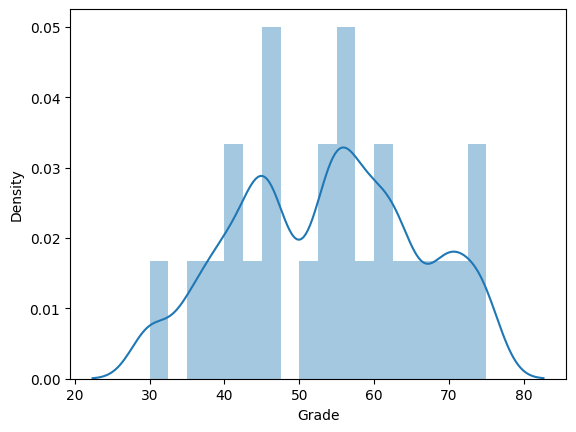

In [ ]:
sns.distplot(newdata.Grade)

In [ ]:
newdata['Age'] = newdata['Age'].apply(lambda x: 29 if x < 24 else x)
newdata['maritaStatus'] = newdata['maritaStatus'].apply(lambda x:0 if x == 'no' else 1)
newdata['Gender'] = newdata['Gender'].replace({'male':1, 'female':0})
#data['hoursOfWork'] = data['hoursOfWork'].round().astype(int)

newdata['Undergrad'] = newdata['Undergrad'].replace({'Agriculture':1, 'Social Sciences':2, 'Business and Management':3, 'Communications Technologies':4, 'Education':5, 'Engineering':6, 'Transportation & Logistics':7, 'Visual and Performing Arts':8, 'Health Professions':9, 'Language & Literature':10, 'Legal Professions and Studies':11, 'Mathematics and Statistics':12, 'General Studies':13, 'Library Science':14, 'Culinary Service':15, 'Biological and Biomedical Sciences':16})
newdata['Nationality'] = newdata['Nationality'].replace({'Africa':1, 'Asia':2, 'North America':3, 'Europe':4, 'South America':5, 'Oceania':6})

In [ ]:
newdata.head(5)

,Age,Undergrad,hoursOfWork,Gender,Nationality,maritaStatus,Grade
0,27,1,24.25,1,1,0,70
1,45,2,12.51,1,1,0,44
2,39,3,9.29,0,1,0,40
3,37,4,16.38,0,2,1,59
4,32,4,13.26,1,2,0,44


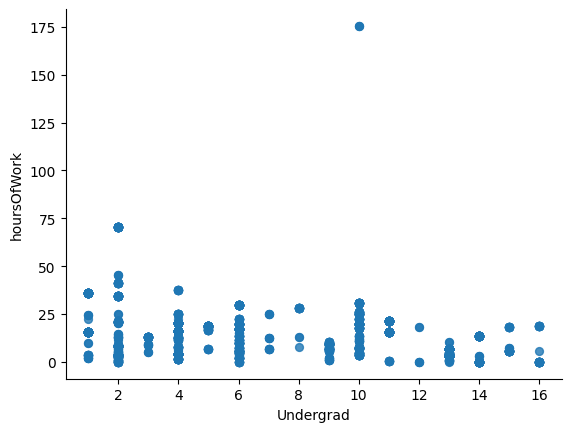

In [ ]:
# @title Undergrad vs hoursOfWork

from matplotlib import pyplot as plt
newdata.plot(kind='scatter', x='Undergrad', y='hoursOfWork', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

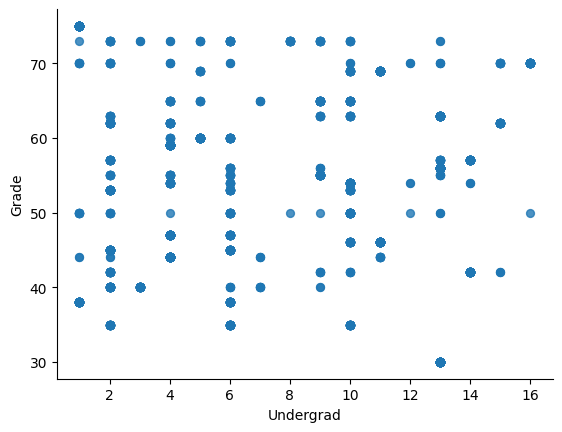

In [ ]:

from matplotlib import pyplot as plt
newdata.plot(kind='scatter', x='Undergrad', y='Grade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

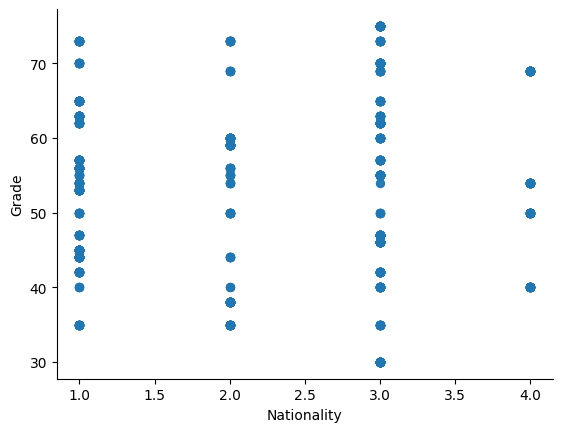

In [ ]:

from matplotlib import pyplot as plt
newdata.plot(kind='scatter', x='Nationality', y='Grade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

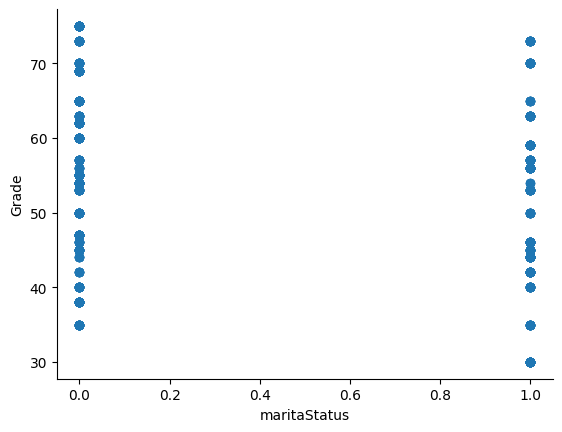

In [ ]:

from matplotlib import pyplot as plt
newdata.plot(kind='scatter', x='maritaStatus', y='Grade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

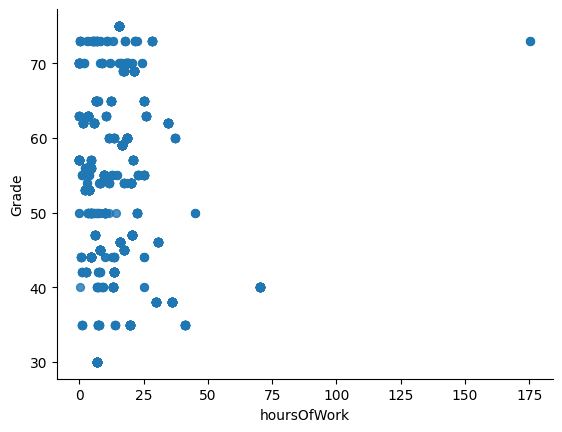

In [ ]:

from matplotlib import pyplot as plt
newdata.plot(kind='scatter', x='hoursOfWork', y='Grade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Collective Pediction

In [ ]:
# Split the data into features and target variable
X = newdata.drop('Grade', axis=1)
y = newdata['Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\n')
print("Random Forest - Mean Absolute Error:", mae_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('\n')
print("Decision Tree - Mean Absolute Error:", mae_dt)
print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - R-squared:", r2_dt)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('\n')
print("Linear Regression - Mean Absolute Error:", mae_lr)
print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R-squared:", r2_lr)

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('\n')
print("SVR - Mean Absolute Error:", mae_svr)
print("SVR - Mean Squared Error:", mse_svr)
print("SVR - R-squared:", r2_svr)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('\n')
print("Ridge Regression - Mean Absolute Error:", mae_rf)
print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared:", r2_ridge)

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print('\n')
print("Gradient Boosting - Mean Absolute Error:", mae_rf)
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R-squared:", r2_gb)



Random Forest - Mean Absolute Error: 0.5620196353436185
Random Forest - Mean Squared Error: 8.188950070126227
Random Forest - R-squared: 0.9430856059917516


Decision Tree - Mean Absolute Error: 0.46563814866760167
Decision Tree - Mean Squared Error: 10.213183730715288
Decision Tree - R-squared: 0.929016887641177


Linear Regression - Mean Absolute Error: 9.74235970231711
Linear Regression - Mean Squared Error: 132.4844572989226
Linear Regression - R-squared: 0.07921375290988819


SVR - Mean Absolute Error: 9.322173110255683
SVR - Mean Squared Error: 134.23214467559364
SVR - R-squared: 0.06706707145410973


Ridge Regression - Mean Absolute Error: 9.742696213665155
Ridge Regression - Mean Squared Error: 132.48184348157298
Ridge Regression - R-squared: 0.0792319193206279


Gradient Boosting - Mean Absolute Error: 2.8932424774044807
Gradient Boosting - Mean Squared Error: 22.974990246710608
Gradient Boosting - R-squared: 0.8403204762467437


In [ ]:
import pickle

pickle.dump(rf_model, open('model.pkl', 'wb'))

print(rf_model.predict([[25, 15, 1, 3, 1, 0]]))

[63.29]


In [ ]:
from google.colab import files

files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


# Nationality

In [ ]:
# Split the data into features and target variable
X = newdata[['Nationality']]
y = newdata['Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\n')
print("Random Forest - Mean Absolute Error:", mae_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('\n')
print("Decision Tree - Mean Absolute Error:", mae_dt)
print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - R-squared:", r2_dt)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('\n')
print("Linear Regression - Mean Absolute Error:", mae_lr)
print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R-squared:", r2_lr)

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('\n')
print("SVR - Mean Absolute Error:", mae_svr)
print("SVR - Mean Squared Error:", mse_svr)
print("SVR - R-squared:", r2_svr)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('\n')
print("Ridge Regression - Mean Absolute Error:", mae_rf)
print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared:", r2_ridge)

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print('\n')
print("Gradient Boosting - Mean Absolute Error:", mae_rf)
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R-squared:", r2_gb)



Random Forest - Mean Absolute Error: 10.202814706917438
Random Forest - Mean Squared Error: 143.49297165897826
Random Forest - R-squared: 0.002702977002322804


Decision Tree - Mean Absolute Error: 10.205381032496538
Decision Tree - Mean Squared Error: 143.4860054389143
Decision Tree - R-squared: 0.002751393244951439


Linear Regression - Mean Absolute Error: 10.082780757946757
Linear Regression - Mean Squared Error: 144.0880282307343
Linear Regression - R-squared: -0.0014327527178605859


SVR - Mean Absolute Error: 10.020079607801764
SVR - Mean Squared Error: 147.4604943158253
SVR - R-squared: -0.024871882508936016


Ridge Regression - Mean Absolute Error: 10.08277815092462
Ridge Regression - Mean Squared Error: 144.08812162409737
Ridge Regression - R-squared: -0.001433401815317259


Gradient Boosting - Mean Absolute Error: 10.205377559382317
Gradient Boosting - Mean Squared Error: 143.4859972028352
Gradient Boosting - R-squared: 0.0027514504868991763


# Undergrad course

In [ ]:
# Split the data into features and target variable
X = newdata[['Undergrad']]
y = newdata['Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\n')
print("Random Forest - Mean Absolute Error:", mae_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('\n')
print("Decision Tree - Mean Absolute Error:", mae_dt)
print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - R-squared:", r2_dt)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('\n')
print("Linear Regression - Mean Absolute Error:", mae_lr)
print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R-squared:", r2_lr)

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('\n')
print("SVR - Mean Absolute Error:", mae_svr)
print("SVR - Mean Squared Error:", mse_svr)
print("SVR - R-squared:", r2_svr)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('\n')
print("Ridge Regression - Mean Absolute Error:", mae_rf)
print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared:", r2_ridge)

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print('\n')
print("Gradient Boosting - Mean Absolute Error:", mae_rf)
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R-squared:", r2_gb)



Random Forest - Mean Absolute Error: 9.124137055108173
Random Forest - Mean Squared Error: 117.37569348963542
Random Forest - R-squared: 0.18422185883989273


Decision Tree - Mean Absolute Error: 9.121866387464326
Decision Tree - Mean Squared Error: 117.29073092727769
Decision Tree - R-squared: 0.1848123610054413


Linear Regression - Mean Absolute Error: 10.083065722339782
Linear Regression - Mean Squared Error: 144.38246945433826
Linear Regression - R-squared: -0.0034791620461580575


SVR - Mean Absolute Error: 9.848167804301003
SVR - Mean Squared Error: 143.64853516272666
SVR - R-squared: 0.0016217880257360928


Ridge Regression - Mean Absolute Error: 10.083065745256974
Ridge Regression - Mean Squared Error: 144.38246938892115
Ridge Regression - R-squared: -0.0034791615914995244


Gradient Boosting - Mean Absolute Error: 9.131518038089768
Gradient Boosting - Mean Squared Error: 117.26110739013974
Gradient Boosting - R-squared: 0.18501824889706953


# Age

In [ ]:
# Split the data into features and target variable
X = newdata[['Age']]
y = newdata['Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\n')
print("Random Forest - Mean Absolute Error:", mae_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('\n')
print("Decision Tree - Mean Absolute Error:", mae_dt)
print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - R-squared:", r2_dt)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('\n')
print("Linear Regression - Mean Absolute Error:", mae_lr)
print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R-squared:", r2_lr)

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('\n')
print("SVR - Mean Absolute Error:", mae_svr)
print("SVR - Mean Squared Error:", mse_svr)
print("SVR - R-squared:", r2_svr)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('\n')
print("Ridge Regression - Mean Absolute Error:", mae_rf)
print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared:", r2_ridge)

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print('\n')
print("Gradient Boosting - Mean Absolute Error:", mae_rf)
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R-squared:", r2_gb)



Random Forest - Mean Absolute Error: 8.605619955913788
Random Forest - Mean Squared Error: 115.0006827980698
Random Forest - R-squared: 0.20072852857362145


Decision Tree - Mean Absolute Error: 8.598423920169466
Decision Tree - Mean Squared Error: 114.99384714380075
Decision Tree - R-squared: 0.20077603736498562


Linear Regression - Mean Absolute Error: 10.079925231491961
Linear Regression - Mean Squared Error: 144.3603105688695
Linear Regression - R-squared: -0.00332515456930782


SVR - Mean Absolute Error: 9.398425818714381
SVR - Mean Squared Error: 138.09498673507971
SVR - R-squared: 0.040219757319510885


Ridge Regression - Mean Absolute Error: 10.079925269495467
Ridge Regression - Mean Squared Error: 144.36031066077305
Ridge Regression - R-squared: -0.0033251552080506563


Gradient Boosting - Mean Absolute Error: 8.596509084067481
Gradient Boosting - Mean Squared Error: 115.04997829298088
Gradient Boosting - R-squared: 0.20038591771433245


# Marital Status

In [ ]:
# Split the data into features and target variable
X = newdata[['maritaStatus']]
y = newdata['Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\n')
print("Random Forest - Mean Absolute Error:", mae_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('\n')
print("Decision Tree - Mean Absolute Error:", mae_dt)
print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - R-squared:", r2_dt)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('\n')
print("Linear Regression - Mean Absolute Error:", mae_lr)
print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R-squared:", r2_lr)

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('\n')
print("SVR - Mean Absolute Error:", mae_svr)
print("SVR - Mean Squared Error:", mse_svr)
print("SVR - R-squared:", r2_svr)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('\n')
print("Ridge Regression - Mean Absolute Error:", mae_rf)
print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared:", r2_ridge)

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print('\n')
print("Gradient Boosting - Mean Absolute Error:", mae_rf)
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R-squared:", r2_gb)



Random Forest - Mean Absolute Error: 9.897326930195758
Random Forest - Mean Squared Error: 136.17874531880034
Random Forest - R-squared: 0.05353791386547779


Decision Tree - Mean Absolute Error: 9.894711381235089
Decision Tree - Mean Squared Error: 136.13504933559472
Decision Tree - R-squared: 0.05384160730400733


Linear Regression - Mean Absolute Error: 9.894711381235089
Linear Regression - Mean Squared Error: 136.13504933559472
Linear Regression - R-squared: 0.05384160730400733


SVR - Mean Absolute Error: 9.84305750350637
SVR - Mean Squared Error: 135.84674614309296
SVR - R-squared: 0.05584535642341393


Ridge Regression - Mean Absolute Error: 9.894760124009569
Ridge Regression - Mean Squared Error: 136.13562736693817
Ridge Regression - R-squared: 0.05383758990209997


Gradient Boosting - Mean Absolute Error: 9.894711899209144
Gradient Boosting - Mean Squared Error: 136.13505495043205
Gradient Boosting - R-squared: 0.05384156828007114
